In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('diabetes.csv')

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Identify output and input

In [17]:
y = df.Outcome
x = df.drop(columns=['Outcome'])

# Choose a machine learning algorithm

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

# Training the model

In [20]:
lr.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Check the accuracy

In [21]:
lr.score(x,y)

0.7825520833333334

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df['Predicted_Outcome']=lr.predict(x)

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted_Outcome
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [25]:
df['Error']  = df.Outcome == df.Predicted_Outcome

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted_Outcome,Error
0,6,148,72,35,0,33.6,0.627,50,1,1,True
1,1,85,66,29,0,26.6,0.351,31,0,0,True
2,8,183,64,0,0,23.3,0.672,32,1,1,True
3,1,89,66,23,94,28.1,0.167,21,0,0,True
4,0,137,40,35,168,43.1,2.288,33,1,1,True


In [27]:
df.Error.value_counts()

True     601
False    167
Name: Error, dtype: int64

In [28]:
601/(601+167)

0.7825520833333334

# Metrics for classification

In [30]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

In [31]:
original = df.Outcome
predicted = lr.predict(x)

In [32]:
cm(original,predicted)

array([[447,  53],
       [114, 154]], dtype=int64)

In [33]:
from  srtools import print_confusion_matrix

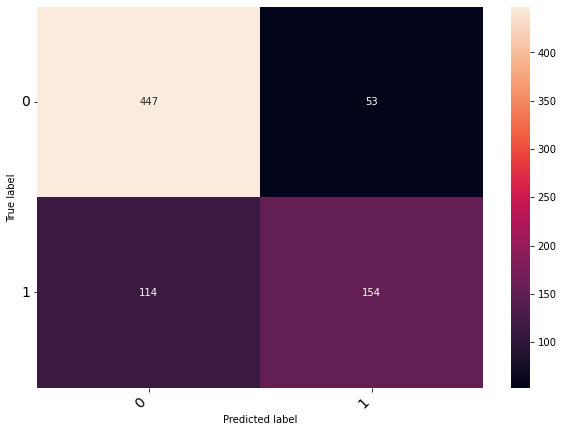

In [34]:
mycm = print_confusion_matrix(cm(original,predicted),lr.classes_)

Accuracy

In [35]:
(447 + 154) /  768

0.7825520833333334

True Positive = You have diabetes and the classifier said you have diabetes

True Negative = You do not have diabetes and the classifier said you do not have diabetes

False Positive = You do not have diabetes and the classifier said you have diabetes

False Negative = You have diabetes and the classifier said you do not have diabetes

In [36]:
print(cr(original,predicted))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768



In [37]:
# precision - Out of the items you called positive how many are actually positive

In [38]:
154/(154+53)

0.7439613526570048

In [39]:
# recall - Out of the actual positives how many could you identify

In [40]:
154/(114+154)

0.5746268656716418

In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [42]:
precision_score(original,predicted)

0.7439613526570048

In [43]:
recall_score(original,predicted)

0.5746268656716418

In [44]:
f1_score(original,predicted)

0.648421052631579

In [45]:
print(cr(original,predicted))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768



In [46]:
# Here for Risk Use cases like fire alarm, medical diagonistcs we use Precesion
# For Non Critical Use cases like corona test we use f1_score
# f1_score is teh root mean harmonic square mean of precision and recall